In [46]:
# %%
# %%
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import fasttext
from sklearn.metrics import classification_report, accuracy_score

level_to_int = {
    "A1": 0,
    "A2": 1,
    "B1": 2,
    "B2": 3,
    "C1": 4,
    "C2": 5,
}

# Load and prepare the data
df = pd.read_csv('analyzed.csv')

# Encode labels for FastText format
df['fasttext_label'] = '__label__' + df['label'].astype(str)
df['text'] = df['text'].astype(str)
df['text'] = df['text'].apply(lambda x: x.replace('\"', ' ').replace('\n', ' '))
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

# Save the train and test data for FastText in the required format
train_df[['fasttext_label', 'text']].to_csv('fasttext_train.txt', index=False, header=False, sep=' ', encoding='utf8')
test_df[['fasttext_label', 'text']].to_csv('fasttext_test.txt', index=False, header=False, sep=' ', encoding='utf8')

# Train the FastText model
model = fasttext.train_supervised('fasttext_train.txt', epoch=25, lr=1.0, wordNgrams=2, verbose=2, bucket=10000)

# Evaluate the model
def evaluate_fasttext(model, test_file):
    # Load the test data
    test_data = []
    with open(test_file, 'r', encoding='utf8') as f:
        lines = f.readlines()
        test_data = [line.strip().split(' ', 1) for line in lines]
    
    y_true = [line[0].replace('__label__', '') for line in test_data]
    y_pred = [model.predict(line[1])[0][0].replace('__label__', '') for line in test_data]
    
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    
    return accuracy, report, y_true, y_pred

accuracy, report, y_test, y_pred = evaluate_fasttext(model, 'fasttext_test.txt')

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

          A1       0.84      0.81      0.82        67
          A2       0.59      0.56      0.57        52
          B1       0.43      0.42      0.42        36
          B2       0.53      0.54      0.53        54
          C1       0.51      0.75      0.60        51
          C2       0.90      0.49      0.63        39

    accuracy                           0.62       299
   macro avg       0.63      0.59      0.60       299
weighted avg       0.64      0.62      0.62       299



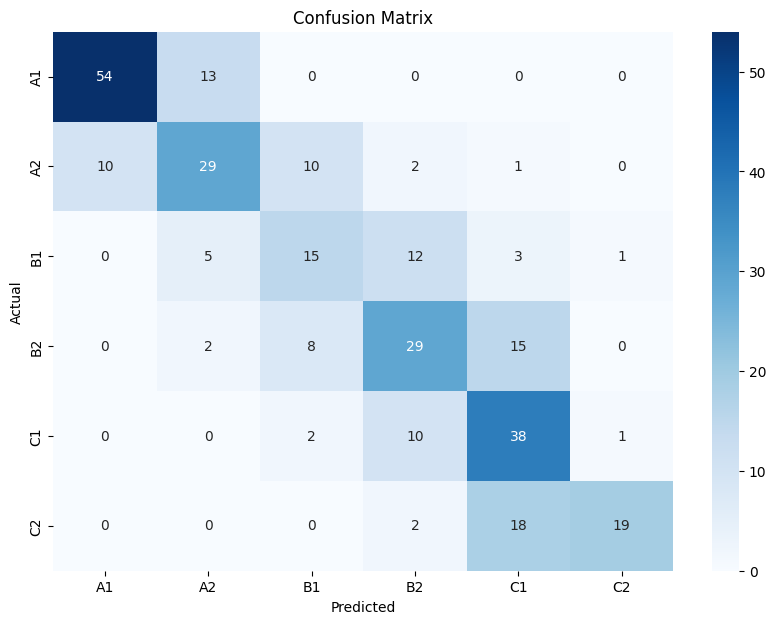

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=level_to_int.keys(), yticklabels=level_to_int.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [48]:

# Custom evaluation metrics for FastText
def custom_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    correct = np.abs(y_true - y_pred) <= 1
    
    tp = np.sum(correct)
    fp = np.sum(~correct)
    fn = fp  # Since every incorrect prediction is a false positive and a false negative in this context

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    accuracy = tp / len(y_true)
    
    return accuracy, precision, recall, f1

metrics = custom_metrics([level_to_int[y] for y in y_test], [level_to_int[y] for y in y_pred])
print(metrics)

# Save the FastText model
model.save_model('fasttext_classifier.ftz')


(0.9565217391304348, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348)


In [4]:
model.quantize('fasttext_train.txt')

In [49]:

# Custom evaluation metrics for FastText
def custom_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    correct = np.abs(y_true - y_pred) <= 1
    
    tp = np.sum(correct)
    fp = np.sum(~correct)
    fn = fp  # Since every incorrect prediction is a false positive and a false negative in this context

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    accuracy = tp / len(y_true)
    
    return accuracy, precision, recall, f1

metrics = custom_metrics([level_to_int[y] for y in y_test], [level_to_int[y] for y in y_pred])
print(metrics)

# Save the FastText model
model.save_model('fasttext_classifier_quantized.ftz')


(0.9565217391304348, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348)
